In [1]:
import os
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import ipywidgets
import tqdm

In [2]:
SIMPATH = '/media/michele/My Book/Michele/MySimulations/MovingBox/beta'

In [3]:
SIM = 'mb.69002'
TRAJ = 'p100_a800_r600'
TIME_LIMIT = 12

In [5]:
sim = simulation.Simulation(os.path.join(SIMPATH, "{}/{}".format(SIM, TRAJ), "out"))
# sim = simulation.MoriaSim('71002')

loading simulation: 71002
Getting sumfile: /home/michele/sim/MoRIA/results/sumfiles/71002.dat


Fixing cosmological parameters of MoRIA simulation


In [6]:
sphere = pynbody.filt.Sphere(5 * pynbody.units.kpc)

In [7]:
mass = list()
r_eff = list()
for snap in tqdm.tqdm(sim.snap_list):
    pynbody.analysis.halo.center(snap.s, vel=False)
    mass.append(snap.s[sphere]['mass'].sum().in_units('Msol'))
    r_eff.append(pynbody.analysis.luminosity.half_light_r(snap))    

100%|██████████| 165/165 [01:06<00:00,  2.47it/s]


In [8]:
def sigma(vel):
    return np.sqrt(((vel - vel.mean(axis=0))**2).mean())

In [9]:
# v_disp = list()
sigma_star = list()
sigma_gas = list()
for snap in tqdm.tqdm(sim.snap_list):
#     v_disp.append(snap.s[sphere]['v_disp'].mean())
    sigma_star.append(sigma(snap.s[sphere]['vel']))
    sigma_gas.append(sigma(snap.g[sphere]['vel']))

ss = np.array(sigma_star)
sg = np.array(sigma_gas)
ss[ss.argmax()] = np.NaN
sg[ss.argmax()] = np.NaN

100%|██████████| 165/165 [00:18<00:00,  9.16it/s]


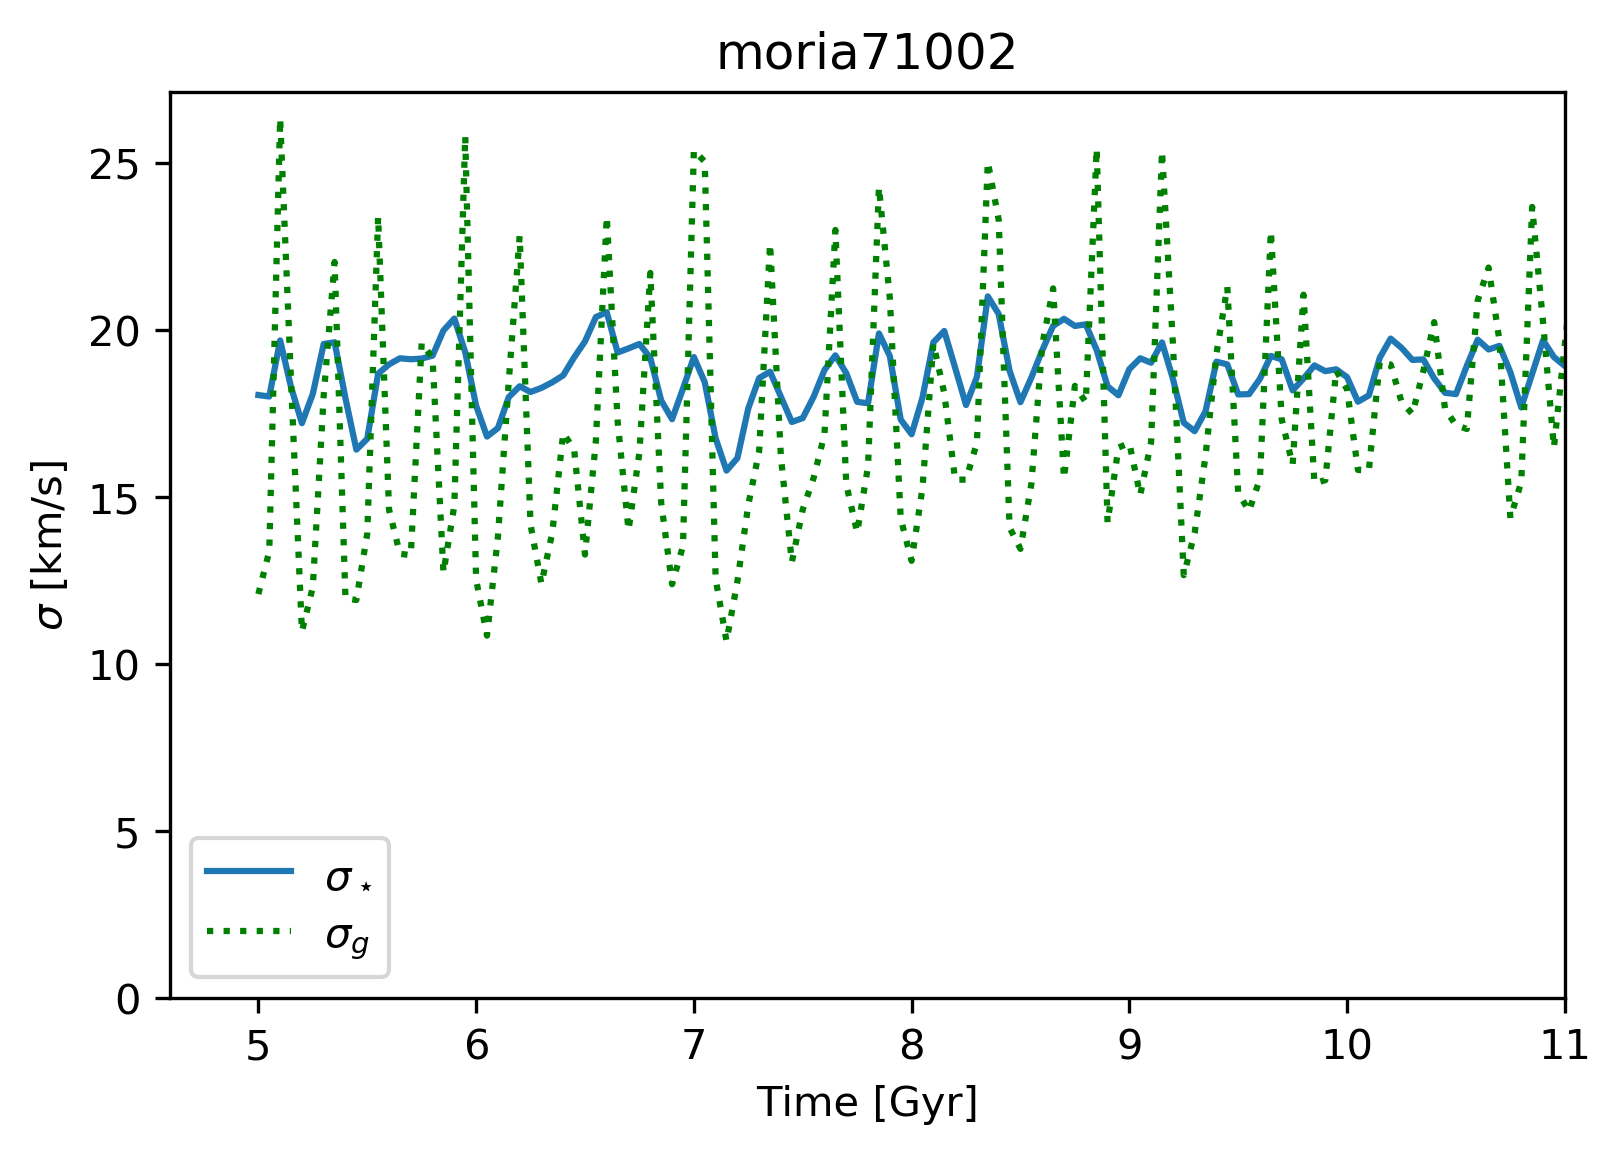

In [13]:
fig, ax_v_disp = plt.subplots(1, figsize=(6,4), dpi=300)
# ax_v_disp.plot(sim.times, v_disp)
ax_v_disp.plot(sim.times, ss, label='$\sigma_\star$')
ax_v_disp.plot(sim.times, sg, 'g:', label='$\sigma_g$')
ax_v_disp.set_ylim(ymin=0);
ax_v_disp.set_xlim(xmax=TIME_LIMIT);
ax_v_disp.set_xlabel("Time [Gyr]")
ax_v_disp.set_ylabel("$\sigma$ [km/s]");
ax_v_disp.set_title('{} {}'.format(SIM, TRAJ));
ax_ram = ax_v_disp.twinx()
ax_ram.plot(sim.dens_trace.t, sim.ram_pressure, 'r--', alpha=0.4)
ax_ram.set_ylabel(r"""$\rho v^2$
[$10^{10}$ M$_\odot$ (km/s)$^2$]""");
ax_v_disp.legend();


In [ ]:
snap.s[sphere]['v_disp']